# Problem Statement

- Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

# Data Description

- Data has 2 Files Train Data and Test Data. Train data has 28 Columns and Test data has 27 Columns
* Columns:-
    * **ID**: Represents a unique identification of an entry
    * **Customer ID**: Represents a unique identification of a person
    * **Month**: Represents the month of the year
    * **Name**: Represents the name of a person
    * **Age**: Represents the age of the person
    * **SSN**: Represents the social security number of a person
    * **Occupation**: Represents the occupation of the person
    * **Annual_Income**: Represents the annual income of the person
    * **Monthly_Inhand_Salary**: Represents the monthly base salary of a person
    * **Num_Bank_Accounts**: Represents the number of bank accounts a person holds
    * **Num_Credit_Card**: Represents the number of other credit cards held by a person
    * **Interest_Rate**: Represents the interest rate on credit card
    * **Num_of_Loan**: Represents the number of loans taken from the bank
    * **Type_of_Loan**: Represents the types of loan taken by a person
    * **Delay_from_due_date**: Represents the average number of days delayed from the payment date
    * **Num_of_Delayed_Payment**: Represents the average number of payments delayed by a person
    * **Changed_Credit_Limit**: Represents the percentage change in credit card limit
    * **Num_Credit_Inquiries**: Represents the number of credit card inquiries
    * **Credit_Mix**: Represents the classification of the mix of credits
    * **Outstanding_Debt**: Represents the remaining debt to be paid (in USD)
    * **Credit_Utilization_Ratio**: Represents the utilization ratio of credit card
    * **Credit_History_Age**: Represents the age of credit history of the person
    * **Payment_of_Min_Amount**: Represents whether only the minimum amount was paid by the person
    * **Total_EMI_per_month**: Represents the Equated Monthly Installments payments (in USD)
    * **Amount_invested_monthly**: Represents the monthly amount invested by the customer (in USD)
    * **Payment_Behaviour**: Represents the payment behavior of the customer (in USD)
    * **Monthly_Balance**: Represents the monthly balance amount of the customer (in USD)
    * **Credit_Score**: Represents the bracket of credit score (Poor, Standard, Good)

# Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("train.csv", sep = "," , encoding = 'utf-8')
test = pd.read_csv("test.csv", sep = "," , encoding = 'utf-8')

In [5]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [6]:
test.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# Data Cleaning & Preprocessing

In [8]:
def filling_na(df, column, type_=None):
    """
    This fucntion for filling null values to work with the data properly
    Parameters:
    df: DataFrame to fill the na with
    column: column which will fill the value in it
    type_: type of data needed be filled

    """
    np.random.seed(7)
    if type_ == "num":
        filling_list = df[column].dropna()
        df[column] = df[column].fillna(pd.Series(np.random.choice(filling_list, size=len(df.index))))
        
    else:
        filling_list = df[column].dropna().unique()
        df[column] = df[column].fillna(pd.Series(np.random.choice(filling_list, size=len(df.index))))
    return df[column]

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [10]:
df.describe(include='O').T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [11]:
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].replace("__10000__", 10000.00)
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].astype("float64")
df["Amount_invested_monthly"].dtype

dtype('float64')

In [12]:
df["Monthly_Balance"] = df["Monthly_Balance"].replace("__-333333333333333333333333333__", 0)
df["Monthly_Balance"] = df["Monthly_Balance"].astype("float64")
df["Monthly_Balance"].dtype

dtype('float64')

In [13]:
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].str.replace(r'_$',"", regex=True)
df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].astype("float64")
df["Num_of_Delayed_Payment"].dtype

dtype('float64')

In [14]:
df["Annual_Income"] = df["Annual_Income"].str.replace(r'_$',"", regex=True)
df["Annual_Income"] = df["Annual_Income"].astype("float64")
df["Annual_Income"].dtype

dtype('float64')

In [15]:
df["Age"] = df["Age"].str.replace(r'_$',"", regex=True)
df["Age"] = df["Age"].astype("int64")
df["Age"].dtype

dtype('int64')

In [16]:
df["Outstanding_Debt"] = df["Outstanding_Debt"].str.replace(r'_$',"", regex=True)
df["Outstanding_Debt"] = df["Outstanding_Debt"].astype("float64")
df["Outstanding_Debt"].dtype

dtype('float64')

In [17]:
df["Occupation"] = df["Occupation"].replace("_______",np.nan)

In [18]:
df["Credit_History_Age_#Year"] = df["Credit_History_Age"].str.split(" ", expand=True)[0]
df["Credit_History_Age_#Month"] = df["Credit_History_Age"].str.split(" ", expand=True)[3]

In [19]:
df["Payment_Behaviour"] = df["Payment_Behaviour"].replace("!@9#%8","Medium_spent_Medium_value_payments")

In [20]:
df.Age.replace(-500, np.median(df.Age), inplace=True)
for i in df.Age.values:
    if i > 118:
        df.Age.replace(i, np.median(df.Age), inplace=True)

In [21]:
df["Num_of_Loan"] = df["Num_of_Loan"].str.replace(r'_$',"", regex=True)
df["Num_of_Loan"] = df["Num_of_Loan"].astype("int64")
df["Num_of_Loan"].dtype

dtype('int64')

In [22]:
df["Credit_Mix"] = df["Credit_Mix"].replace("_", "Don't Have")

In [23]:
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].replace("_", 0)
df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].astype("float64")

In [24]:
df.Num_of_Loan.replace(-100, np.median(df.Num_of_Loan), inplace=True)
for i in df.Num_of_Loan.values:
    if i > 10:
        df.Num_of_Loan.replace(i, np.median(df.Num_of_Loan), inplace=True)

In [25]:
df["Interest_Rate"] = df["Interest_Rate"].astype("float64")
df["Interest_Rate"] = df["Interest_Rate"]/100

In [26]:
for i in df.Interest_Rate:
    if i > 20:
        df.Interest_Rate.replace(i, np.median(df.Interest_Rate), inplace=True)

In [27]:
for i in df.Num_Bank_Accounts:
    if i > 100:
        df.Num_Bank_Accounts.replace(i, np.median(df.Num_Bank_Accounts), inplace=True)

In [28]:
for i in df.Num_Credit_Card:
    if i > 50:
        df.Num_Credit_Card.replace(i, np.median(df.Num_Credit_Card), inplace=True)

In [29]:
df["Monthly_Inhand_Salary"] = filling_na(df, "Monthly_Inhand_Salary", "num")
df["Num_Credit_Inquiries"] = filling_na(df, "Num_Credit_Inquiries", "num")
df["Amount_invested_monthly"] = filling_na(df, "Amount_invested_monthly", "num")
df["Num_of_Delayed_Payment"] = filling_na(df, "Num_of_Delayed_Payment", "num")
df["Monthly_Balance"] = filling_na(df, "Monthly_Balance", "num")
df["Credit_History_Age_#Year"] = filling_na(df, "Credit_History_Age_#Year", "num")
df["Credit_History_Age_#Month"] = filling_na(df, "Credit_History_Age_#Month", "num")
df["Type_of_Loan"] = filling_na(df, "Type_of_Loan")
df["Credit_History_Age"] = filling_na(df, "Credit_History_Age")
df["Occupation"] = filling_na(df, "Occupation")

In [30]:
df["Credit_History_Age_#Year"] = df["Credit_History_Age_#Year"].astype("int64")
df["Credit_History_Age_#Month"] = df["Credit_History_Age_#Month"].astype("int64")
df["Credit_History_Age_#Month"] = round(df["Credit_History_Age_#Month"] / 12, 2)
df["Credit_History_Age_In_Years"] = df["Credit_History_Age_#Year"] + df["Credit_History_Age_#Month"]

In [31]:
df.drop_duplicates(subset="ID", inplace=True)
df.drop(["Name", "Credit_History_Age", "Credit_History_Age_#Year", "Credit_History_Age_#Month", "ID", "Customer_ID","SSN"], axis=1, inplace=True)

In [32]:
df.Type_of_Loan = df.Type_of_Loan.str.replace("and", "")
df.Type_of_Loan = df.Type_of_Loan.str.replace(" ", "")

cat_values=[]
loan_cat = df.Type_of_Loan.unique()
for i in loan_cat:
    for j in i.split(","):
        cat_values.append(j)

loan_types = set([x.strip(' ') for x in set(cat_values)])
loan_types = list(loan_types)
loan_types

['AutoLoan',
 'HomeEquityLoan',
 'StudentLoan',
 'DebtConsolidationLoan',
 'NotSpecified',
 'MortgageLoan',
 'PaydayLoan',
 'PersonalLoan',
 'Credit-BuilderLoan']

In [33]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_In_Years
0,January,23,Scientist,19114.12,1824.843333,3,4,0.03,4,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",...,Don't Have,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,22.08
1,February,23,Scientist,19114.12,1082.203750,3,4,0.03,4,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,26.42
2,March,33,Scientist,19114.12,2686.018333,3,4,0.03,4,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",...,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,22.25
3,April,23,Scientist,19114.12,2201.945833,3,4,0.03,4,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,22.33
4,May,23,Scientist,19114.12,1824.843333,3,4,0.03,4,"AutoLoan,Credit-BuilderLoan,PersonalLoan,HomeE...",...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,22.42


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Month                        100000 non-null  object 
 1   Age                          100000 non-null  int64  
 2   Occupation                   100000 non-null  object 
 3   Annual_Income                100000 non-null  float64
 4   Monthly_Inhand_Salary        100000 non-null  float64
 5   Num_Bank_Accounts            100000 non-null  int64  
 6   Num_Credit_Card              100000 non-null  int64  
 7   Interest_Rate                100000 non-null  float64
 8   Num_of_Loan                  100000 non-null  int64  
 9   Type_of_Loan                 100000 non-null  object 
 10  Delay_from_due_date          100000 non-null  int64  
 11  Num_of_Delayed_Payment       100000 non-null  float64
 12  Changed_Credit_Limit         100000 non-null  float64
 13  

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.318990,1.064554e+01,14.000000,25.000000,33.000000,41.000000,1.180000e+02
Annual_Income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,100000.0,4193.254053,3.184554e+03,303.645417,1625.485208,3089.424167,5964.883333,1.520463e+04
Num_Bank_Accounts,100000.0,5.410010,2.951401e+00,-1.000000,3.000000,6.000000,7.000000,1.000000e+02
Num_Credit_Card,100000.0,5.536430,2.151232e+00,0.000000,4.000000,5.000000,7.000000,5.000000e+01
Interest_Rate,100000.0,0.214428,9.483375e-01,0.010000,0.080000,0.130000,0.200000,1.999000e+01
Num_of_Loan,100000.0,3.510550,2.395985e+00,0.000000,2.000000,3.000000,5.000000,9.000000e+00
Delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,30.669270,2.240522e+02,-3.000000,9.000000,14.000000,18.000000,4.397000e+03
Changed_Credit_Limit,100000.0,10.171791,6.880628e+00,-6.490000,4.970000,9.250000,14.660000,3.697000e+01


In [36]:
df.describe(include='O').T

,count,unique,top,freq
Month,100000,8,January,12500
Occupation,100000,15,Lawyer,7093
Type_of_Loan,100000,6260,NotSpecified,1409
Credit_Mix,100000,4,Standard,36479
Payment_of_Min_Amount,100000,3,Yes,52326
Payment_Behaviour,100000,7,Low_spent_Small_value_payments,25513
Credit_Score,100000,3,Standard,53174


# Exploratory Data Analysis

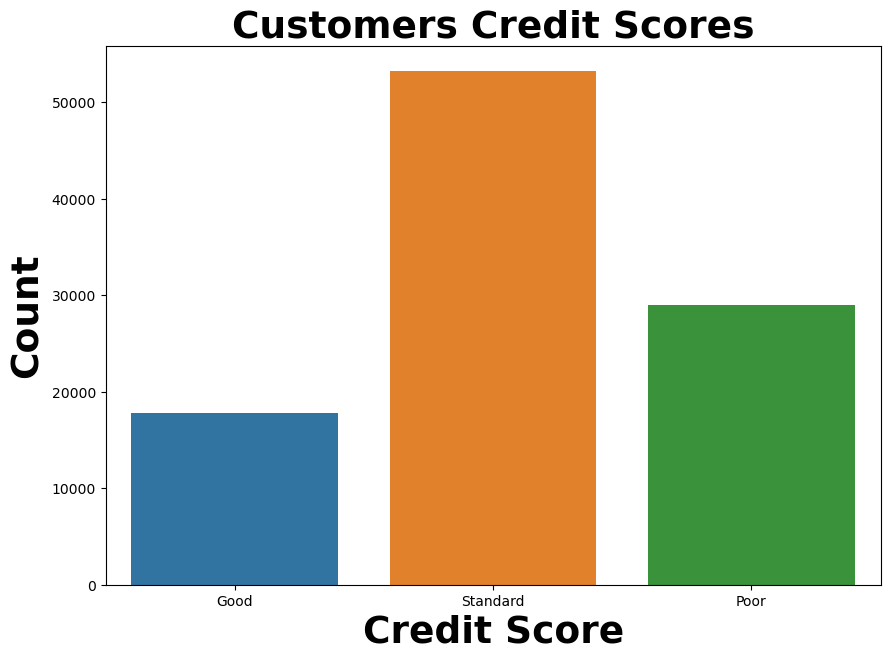

In [37]:
plt.figure(figsize=(10,7))
sns.countplot(data = df, x="Credit_Score")
plt.title("Customers Credit Scores", size=27,fontweight="bold")
plt.xlabel("Credit Score", size=27,fontweight="bold")
plt.ylabel("Count", size=27,fontweight="bold")
plt.show()

**Comment:**
<br>
* Most people fill in the standard category

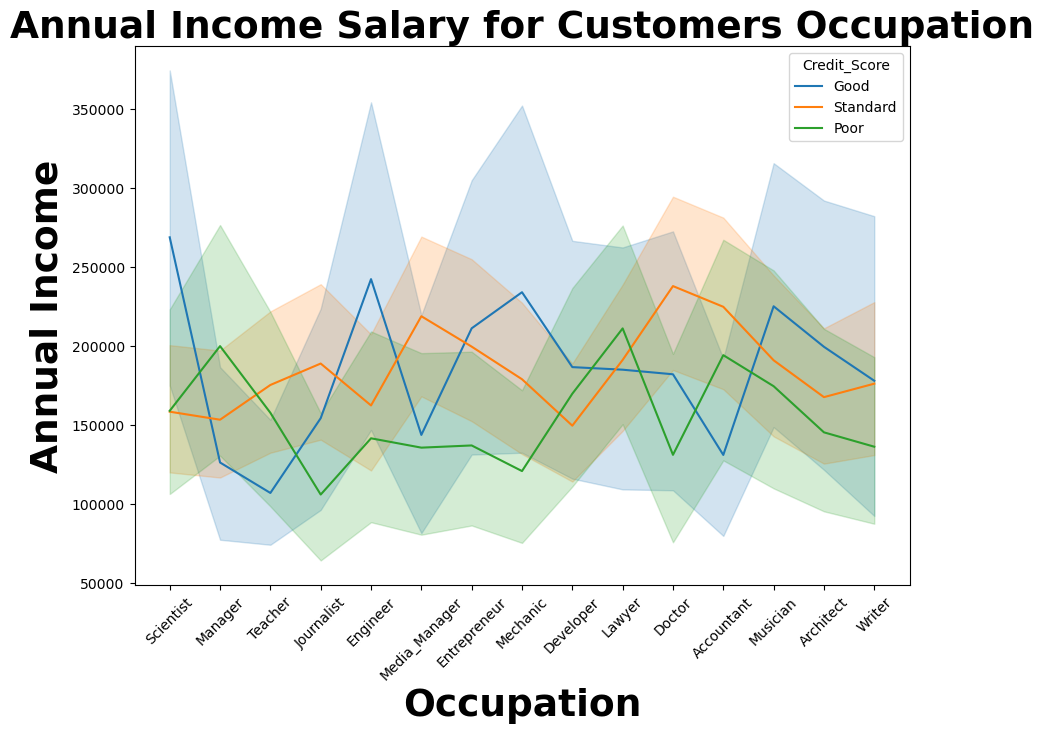

In [38]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x="Occupation", y="Annual_Income", hue="Credit_Score")
plt.xticks(rotation=45)
plt.title("Annual Income Salary for Customers Occupation", size=27,fontweight="bold")
plt.xlabel("Occupation", size=27,fontweight="bold")
plt.ylabel("Annual Income", size=27,fontweight="bold")
plt.show()

**Comment:**
<br>
* The Annual Income of the Cutomers doesn't affect on the credit score as we see that the variance on the annual income and the people can still have a good credit score whether the cutomer has a 100000 USD or 250000 USD Annually

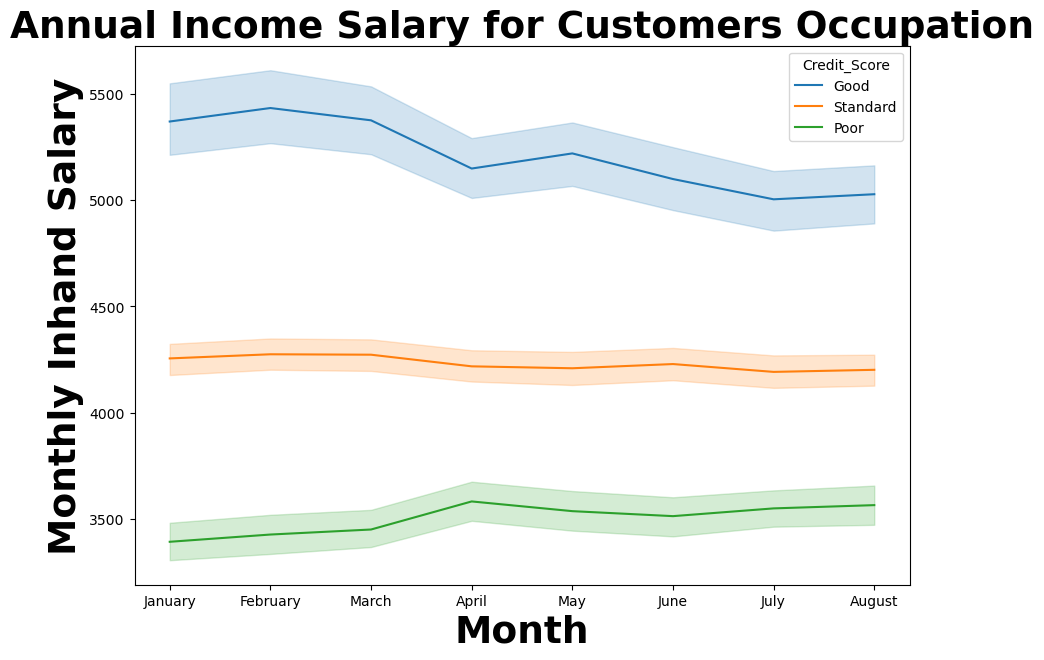

In [39]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x="Month", y="Monthly_Inhand_Salary", hue="Credit_Score")
plt.title("Annual Income Salary for Customers Occupation", size=27,fontweight="bold")
plt.xlabel("Month", size=27,fontweight="bold")
plt.ylabel("Monthly Inhand Salary", size=27,fontweight="bold")
plt.show()

**Comment:**
<br>
* People who has a high inhand monthly salary have a good credit score and who has a low inhand salary has a low credit score

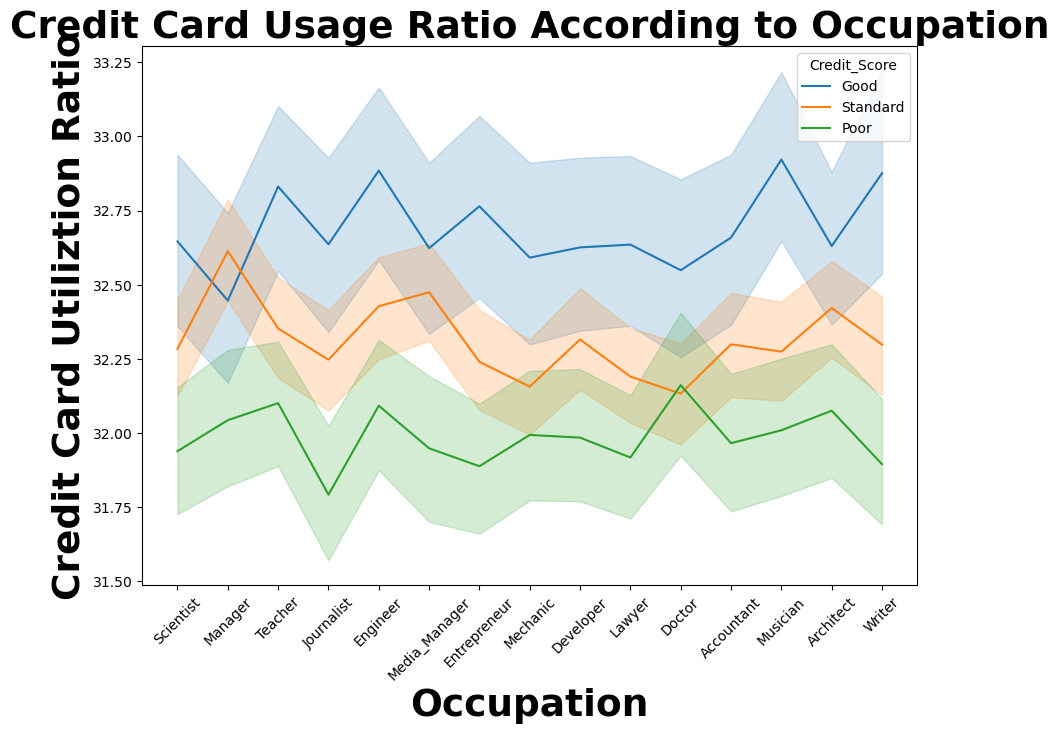

In [40]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x="Occupation", y="Credit_Utilization_Ratio", hue="Credit_Score")
plt.xticks(rotation=45)
plt.title("Credit Card Usage Ratio According to Occupation", size=27,fontweight="bold")
plt.xlabel("Occupation", size=27,fontweight="bold")
plt.ylabel("Credit Card Utiliztion Ratio", size=27,fontweight="bold")
plt.show()

**Comment:**
<br>
* More the People use the credit card it makes the credit score much better

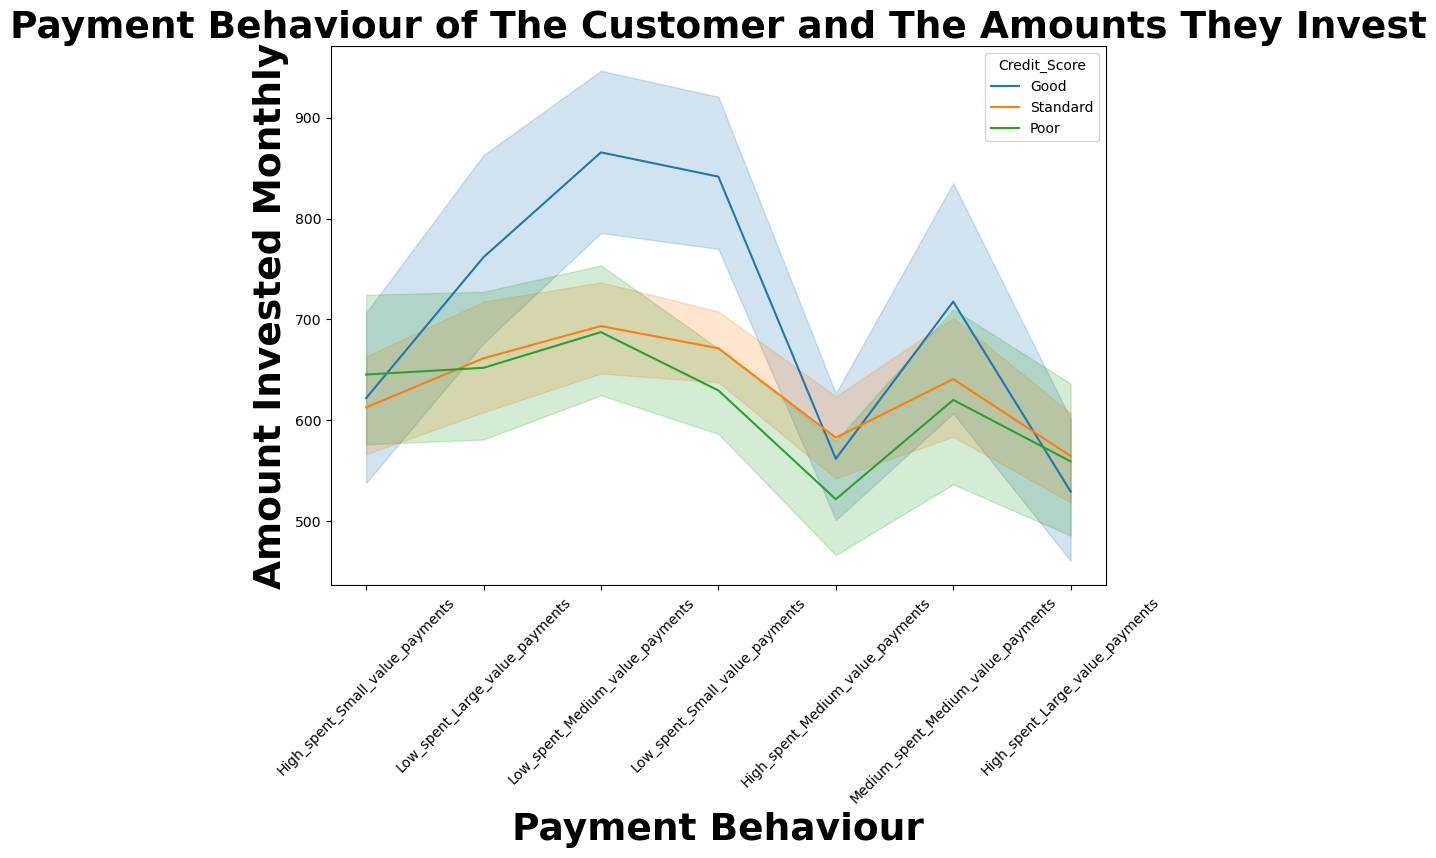

In [41]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x="Payment_Behaviour", y="Amount_invested_monthly", hue="Credit_Score")
plt.xticks(rotation=45)
plt.title("Payment Behaviour of The Customer and The Amounts They Invest", size=27,fontweight="bold")
plt.xlabel("Payment Behaviour", size=27,fontweight="bold")
plt.ylabel("Amount Invested Monthly", size=27,fontweight="bold")
plt.show()

**Comment:**
<br>
* Most People who invest between **700 to 800 USD** of their money have a good Credit Score and most people who have a standard credit score invest between **600 to 700 USD** per Month

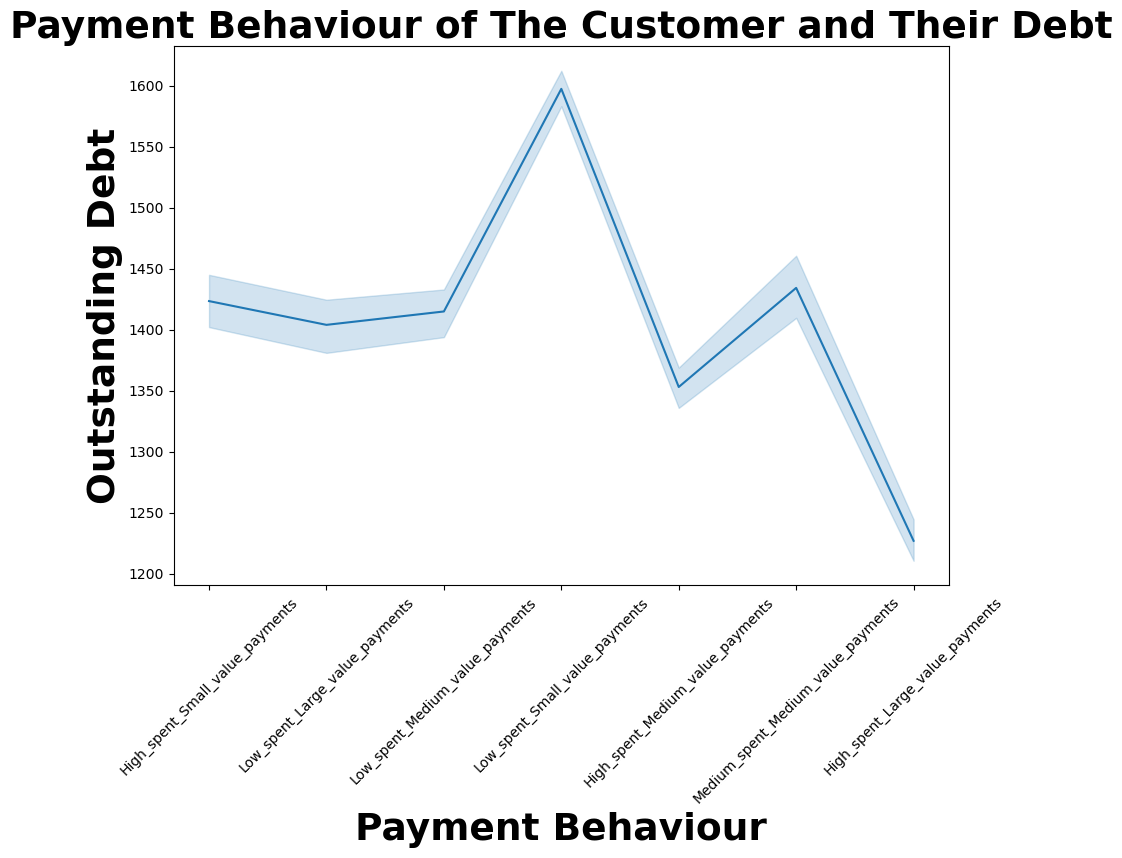

In [42]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x="Payment_Behaviour", y="Outstanding_Debt")
plt.xticks(rotation=45)
plt.title("Payment Behaviour of The Customer and Their Debt", size=27,fontweight="bold")
plt.xlabel("Payment Behaviour", size=27,fontweight="bold")
plt.ylabel("Outstanding Debt", size=27,fontweight="bold")
plt.show()

**Comment:**
<br>
* People who don't use the credit card so much but also pay small portion of the credit card has the majority on the outstanding debt **(Low_spent_Small_value_payments)** and the Category after that which has the 2nd most outstanding debt the people who **(Medium_spent_Medium_value_payments)**.
<br>
* The people who have the least outstanding debt are **Hight_spent_High_value_payments**.

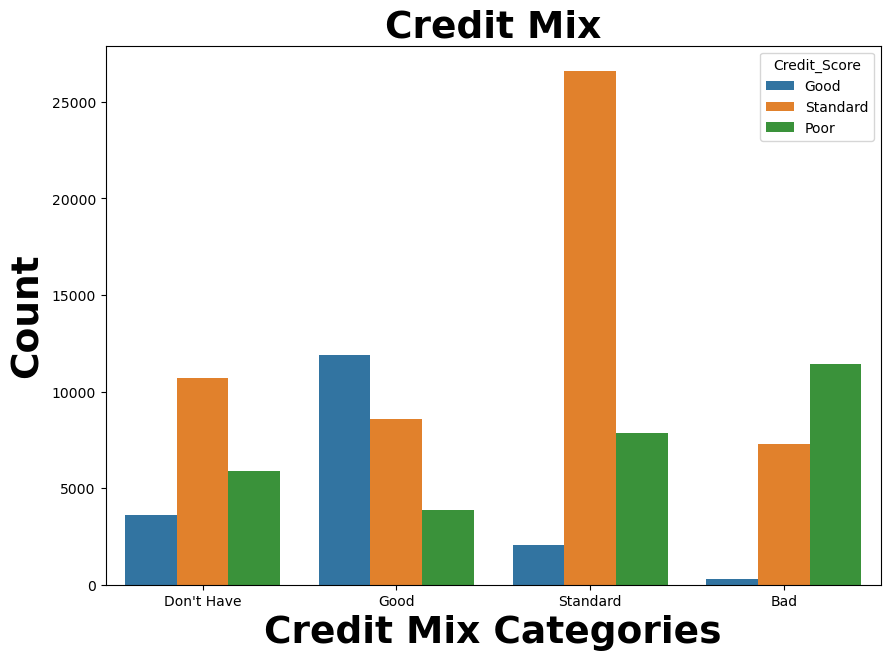

In [43]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x="Credit_Mix", hue="Credit_Score")
#plt.xticks(rotation=45)
plt.title("Credit Mix", size=27,fontweight="bold")
plt.xlabel("Credit Mix Categories", size=27,fontweight="bold")
plt.ylabel("Count", size=27,fontweight="bold")
plt.show()

**Comment:**
<bar>
* People who don't have a credit mix most of them has a Standard Credit score and the 2nd most category has a bad credit Score.
<bar>
* People who have a good credit mix most of them have a good credit score and the 2nd most category has a standard credit score.
<bar>
* People who have astandard mix most of them has a standard credit score and the 2nd most category have a bad credit score.
<bar>
* People who have a bad credit mix most of the has a bad credit score and the 2nd most category have a standard credit score.

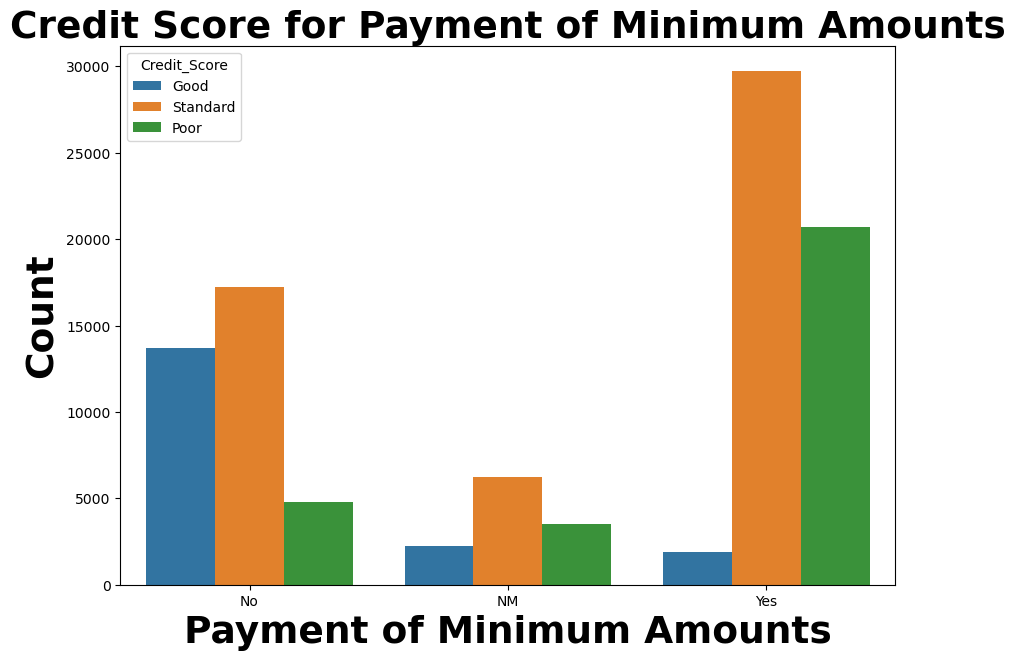

In [44]:
plt.figure(figsize=(10,7))
sns.countplot(data = df, x = 'Payment_of_Min_Amount',hue="Credit_Score")
plt.title("Credit Score for Payment of Minimum Amounts", size=27,fontweight="bold")
plt.xlabel("Payment of Minimum Amounts", size=27,fontweight="bold")
plt.ylabel("Count", size=27,fontweight="bold")
plt.show()

**Comment:**
<br>
* Customers who pay the minimum amounts has a poor credit score which but the people who don't pay the minimum amounts has a good credit score more than the others which mean that there are a lot of people who stay in debt for a long time as they don't pay the all amounts and they pay part of it which made an insterest on them.

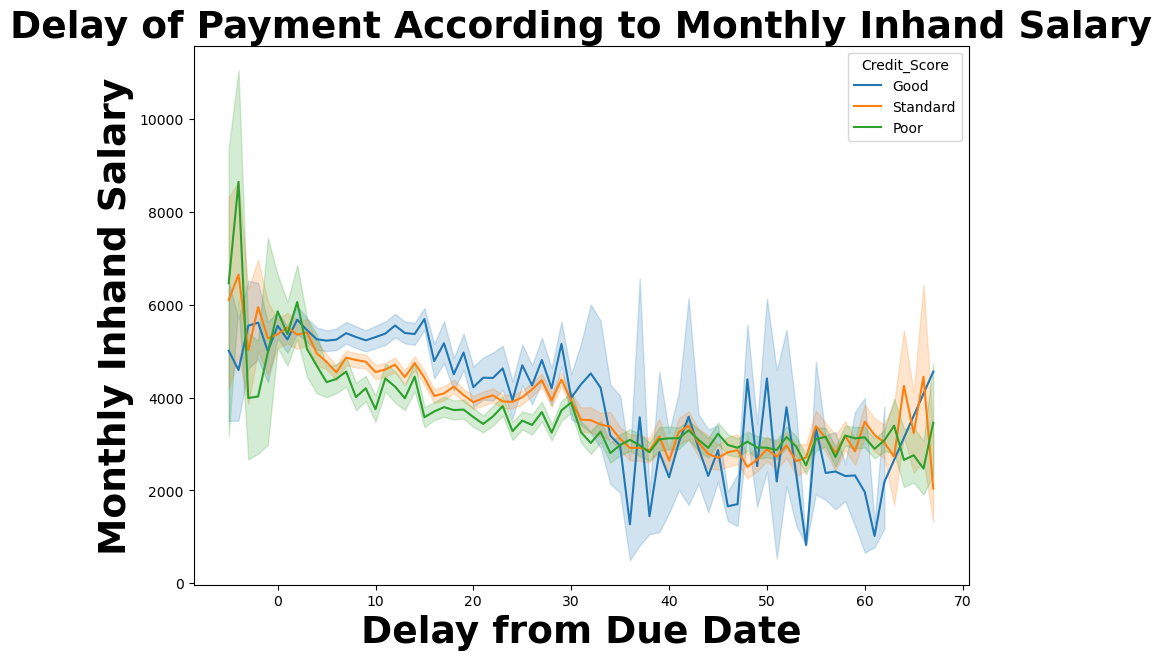

In [45]:
plt.figure(figsize=(10,7))
sns.lineplot(data = df, x = 'Delay_from_due_date', y = 'Monthly_Inhand_Salary', hue="Credit_Score")
plt.title("Delay of Payment According to Monthly Inhand Salary", size=27,fontweight="bold")
plt.xlabel("Delay from Due Date", size=27,fontweight="bold")
plt.ylabel("Monthly Inhand Salary", size=27,fontweight="bold")
plt.show()

**Comment:**
<br>
* More the Customer has less Monthly inhand Salary more he where Delayed from Due Date but at the same time, There are peole who delayed from the due date but also have a good credit score.

In [46]:
df["Age_Group"] = pd.cut(df.Age, bins=[14,25,30,45,55,95,120], labels=["14-25", "25-30", "30-45", "45-55", "55-95", "95-120"])
age_groups = df.groupby(["Age_Group", "Credit_Score"])["Outstanding_Debt","Annual_Income","Num_Bank_Accounts", "Num_Credit_Card"].sum().reset_index()
age_groups

,Age_Group,Credit_Score,Outstanding_Debt,Annual_Income,Num_Bank_Accounts,Num_Credit_Card
0,14-25,Good,3137180.79,6.649730e+08,13799,15490
1,14-25,Poor,19005227.84,1.430461e+09,59369,58506
2,14-25,Standard,19952090.01,2.223223e+09,79088,77066
3,25-30,Good,1825730.64,3.288637e+08,7940,9083
4,25-30,Poor,9617599.66,7.935326e+08,29979,29512
5,25-30,Standard,9651424.60,1.372142e+09,41370,40866
6,30-45,Good,6071054.67,1.351365e+09,25420,30938
7,30-45,Poor,28685654.13,1.908736e+09,89952,89917
8,30-45,Standard,31548539.35,4.717357e+09,130148,129358
9,45-55,Good,3116857.45,9.038921e+08,14801,18157


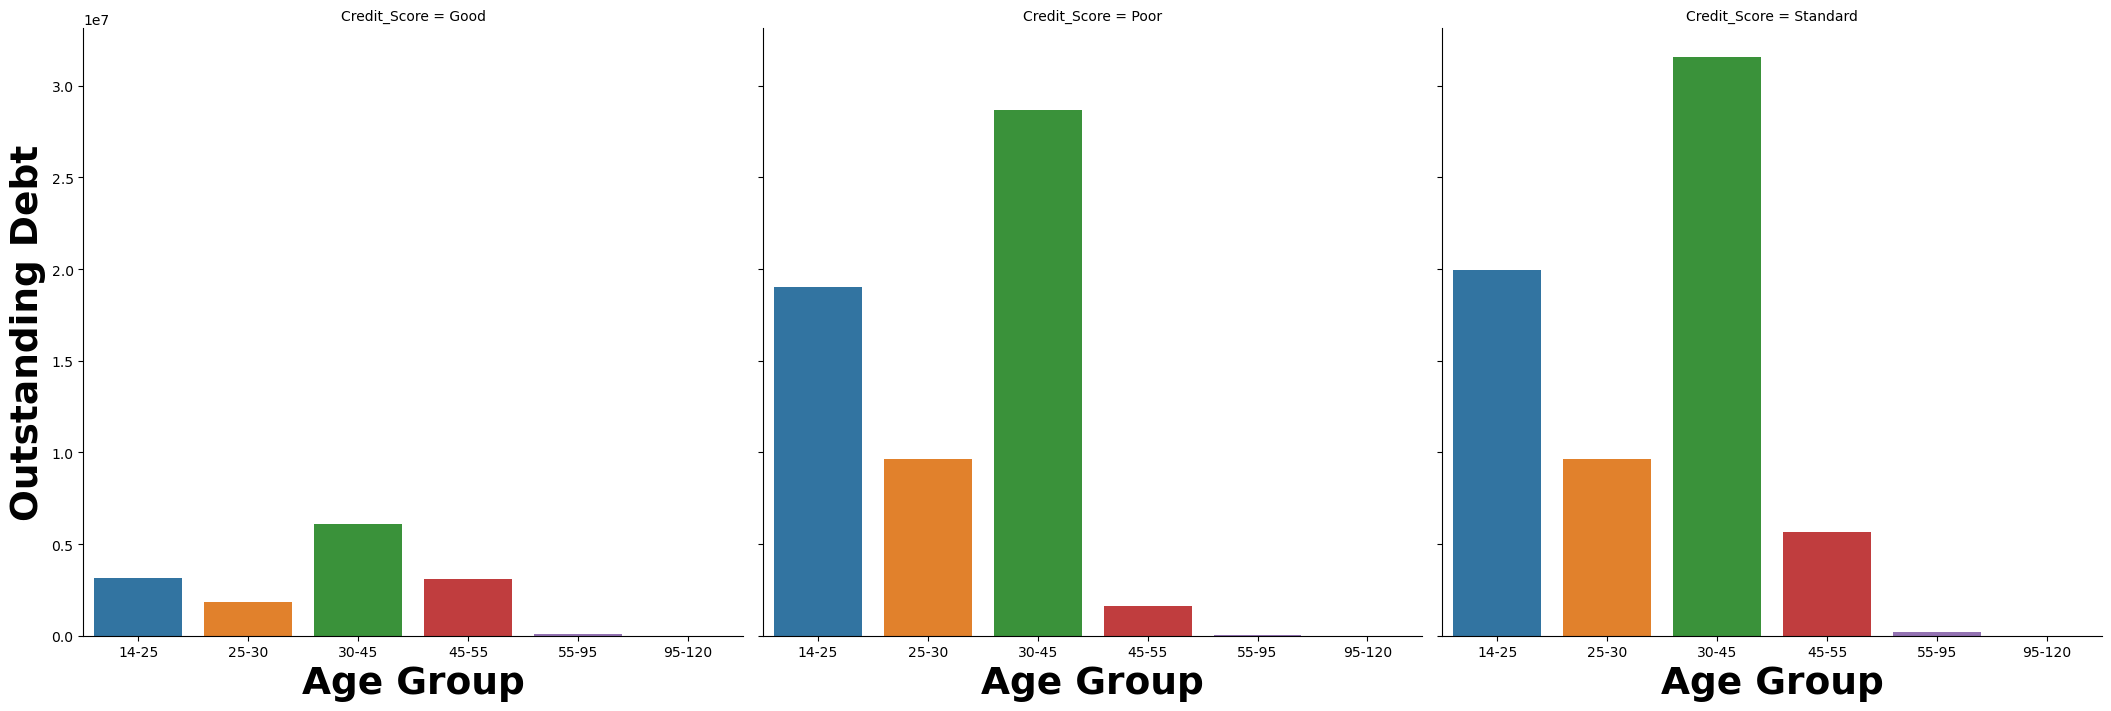

In [47]:
g = sns.catplot(data=age_groups, x="Age_Group", y="Outstanding_Debt", height=7, aspect=1, col="Credit_Score", kind="bar", ci=None)
g.set_axis_labels( "Age Group", "Outstanding Debt", size=27,fontweight="bold")
plt.show()

**Comment:**
<br>
* Customers Between age of 30 and 45 the most category who have a lot of outstanding debts which mean that people in their youth age have a high purchase power and Cutomers between 45 to 55 their outstaning debt is less than young people.

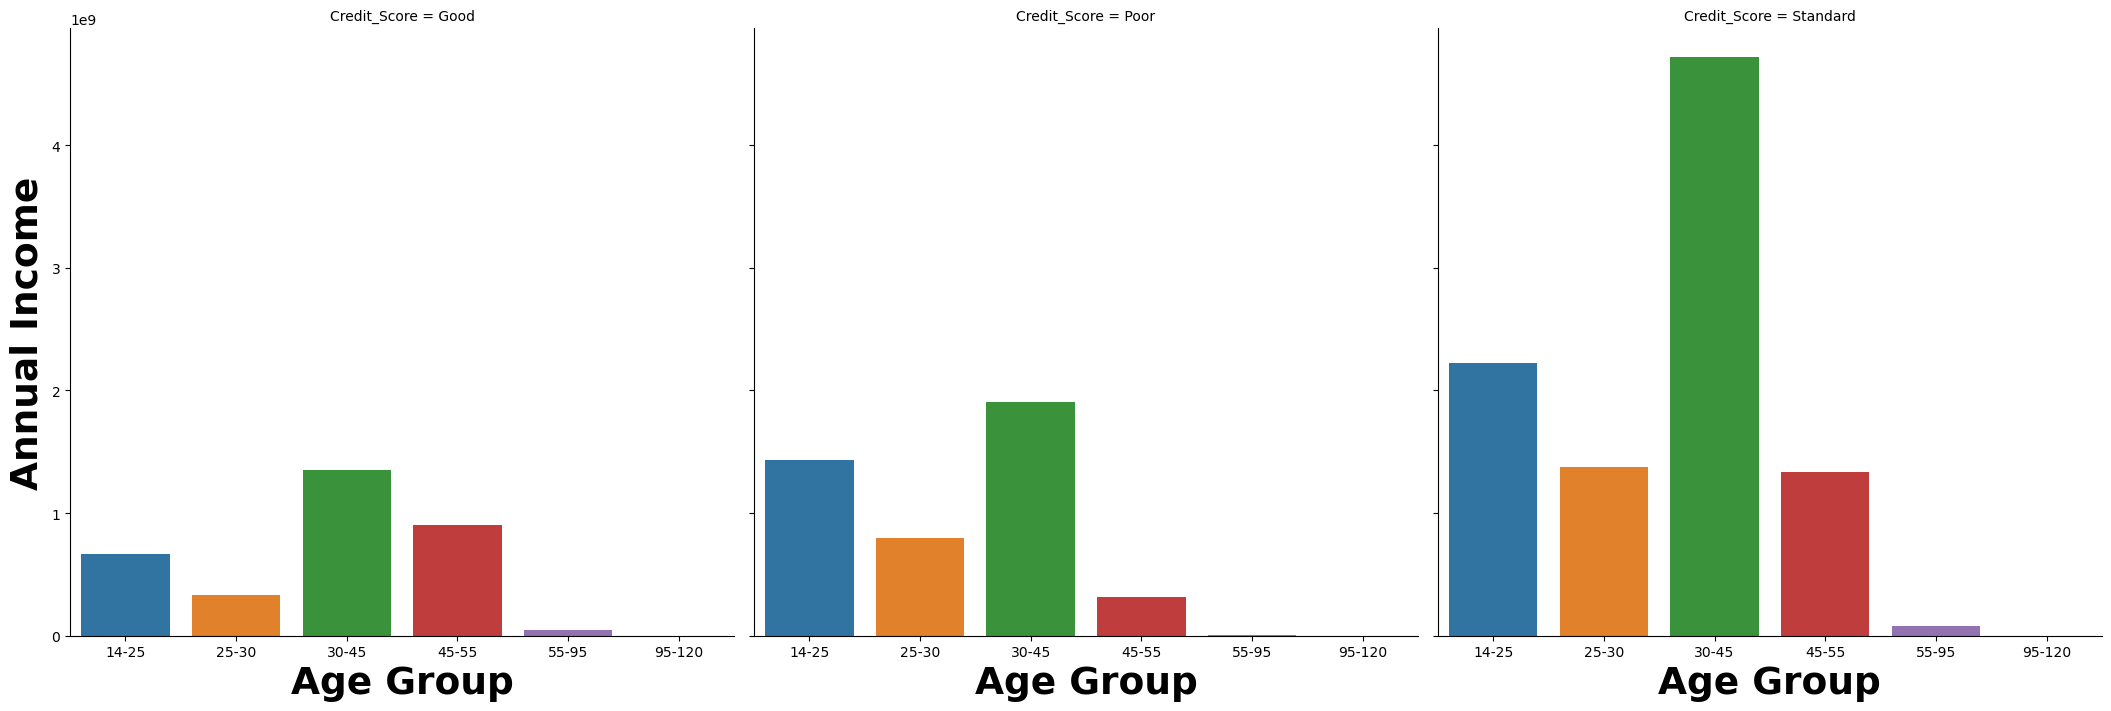

In [48]:
g = sns.catplot(data=age_groups, x="Age_Group", y="Annual_Income", height=7, aspect=1, col="Credit_Score", kind="bar", ci=None)
g.set_axis_labels( "Age Group", "Annual Income", size=27,fontweight="bold")
plt.show()

**Comment:**
<br>
* Customers between age 30 and 45 has the most Annual Income and the 2nd more group age are customers between 14 and 25 which mean not people from 25 and 30 which indicate that there are people who can make money in a young age more than the old people but as the same time as indication that the 2 largest Categories most of their credit score are Standard or Poor but the as for the people between 45 and 55 have more good credit score than the young people from 14 to 25

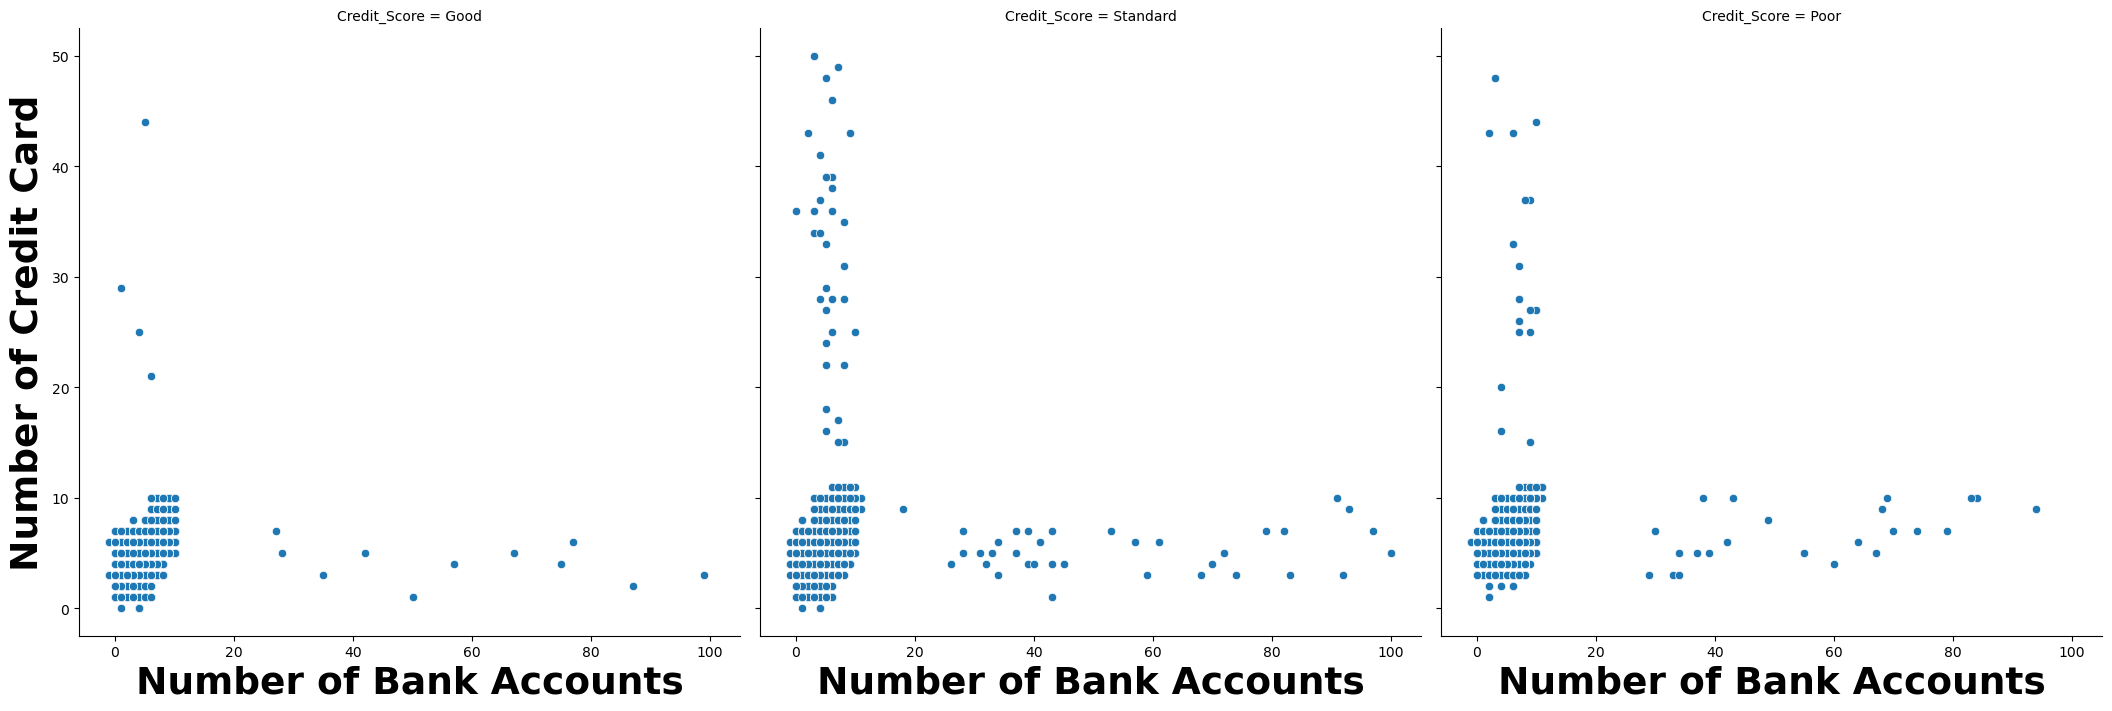

In [49]:
g = sns.relplot(data=df, x="Num_Bank_Accounts", y="Num_Credit_Card", col="Credit_Score", height=7, aspect=1)
g.set_axis_labels( "Number of Bank Accounts", "Number of Credit Card", size=27,fontweight="bold")
plt.show()

**Comment:**
<br>
* Most peopel have Accounts from 0 to 10 Accounts and the number of credit cards also from 0 to 10 which mean each account has at least one credit card

# Prepare Data for Modeling

In [50]:
df["AutoLoan"] = 0
df["Credit-BuilderLoan"] = 0
df["DebtConsolidationLoan"] = 0
df["HomeEquityLoan"] = 0
df["MortgageLoan"] = 0
df["NotSpecified"] = 0
df["PaydayLoan"] = 0
df["PersonalLoan"] = 0
df["StudentLoan"] = 0
index = 0
for i in df.Type_of_Loan:
    for j in i.split(','):
        df[j][index] = 1
    index+=1

In [51]:
le = LabelEncoder()
df.Credit_Mix = le.fit_transform(df.Credit_Mix)
df.Credit_Mix.value_counts()

3    36479
2    24337
1    20195
0    18989
Name: Credit_Mix, dtype: int64

In [52]:
le = LabelEncoder()
df.Payment_of_Min_Amount = le.fit_transform(df.Payment_of_Min_Amount)
df.Payment_of_Min_Amount.value_counts()

2    52326
1    35667
0    12007
Name: Payment_of_Min_Amount, dtype: int64

In [53]:
le = LabelEncoder()
df.Payment_Behaviour = le.fit_transform(df.Payment_Behaviour)
df.Payment_Behaviour.value_counts()

5    25513
1    17540
4    13861
0    13721
2    11340
3    10425
6     7600
Name: Payment_Behaviour, dtype: int64

In [54]:
le = LabelEncoder()
df.Credit_Score = le.fit_transform(df.Credit_Score)
df.Credit_Score.value_counts()

2    53174
1    28998
0    17828
Name: Credit_Score, dtype: int64

In [55]:
x = df.drop(["Month", "Age", "Occupation", "Type_of_Loan", "Credit_Score", "Age_Group"], axis=1).values
y = df["Credit_Score"].values

# Modeling

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2,random_state=77)

In [55]:
xgbc = xgb.XGBClassifier() 

In [74]:
param_grid = {"classifier__max_depth": [3,5,7,9,11], "classifier__learning_rate": [0.1, 0.4, 0.5, 0.6, 0.7], "classifier__n_estimators": [100, 200, 300, 400], "classifier__eta": [0.01, 0.05, 0.12, 0.2, 0.3], "classifier__subsample": [0.5, 0.6, 0.7, 0.8, 1]}

In [57]:
param = {"max_depth": [3,5,7,9,11], "learning_rate": [0.1, 0.4, 0.5], "n_estimators": [100, 200, 300, 400], "eta": [0.01, 0.05, 0.12], "subsample": [0.5, 0.6, 0.7]}

In [76]:
param_grid

{'classifier__max_depth': [3, 5, 7, 9, 11],
 'classifier__learning_rate': [0.1, 0.4, 0.5, 0.6, 0.7],
 'classifier__n_estimators': [100, 200, 300, 400],
 'classifier__eta': [0.01, 0.05, 0.12, 0.2, 0.3],
 'classifier__subsample': [0.5, 0.6, 0.7, 0.8, 1]}

In [75]:
pipe = Pipeline([
    ["smote", SMOTE(random_state=77)],
    ["scaler", StandardScaler()],
    ["reducer", PCA()],
    ["classifier", XGBClassifier()]
])

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=77)

max_depth=5, learning_rate=0.1, n_estimators=300, eta=0.01, subsample=0.7

In [77]:
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="accuracy",
    n_jobs=-1,
    cv=stratified_kfold)

In [ ]:
grid_search.fit(xtrain, ytrain)

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.score(xtest,ytest)

In [ ]:
grid_search.best_estimator_

In [1]:
import joblib
joblib.dump(grid_search, 'model1.pkl')

NameError: name 'grid_search' is not defined

In [2]:
model_load = joblib.load("model1.pkl")

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [57]:
model_load.score(xtest,ytest)

0.7139

In [63]:
! pip list  > requirements1.txt

In [60]:
! pip3 freeze > requirements1.txt